# Importing the Data

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paololol/league-of-legends-ranked-matches")

print("Path to dataset files:", path)

Path to dataset files: /Users/froguro/.cache/kagglehub/datasets/paololol/league-of-legends-ranked-matches/versions/9


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/Users/froguro/.cache/kagglehub/datasets/paololol/league-of-legends-ranked-matches/versions/9'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/Users/froguro/.cache/kagglehub/datasets/paololol/league-of-legends-ranked-matches/versions/9/stats1.csv
/Users/froguro/.cache/kagglehub/datasets/paololol/league-of-legends-ranked-matches/versions/9/champs.csv
/Users/froguro/.cache/kagglehub/datasets/paololol/league-of-legends-ranked-matches/versions/9/stats2.csv
/Users/froguro/.cache/kagglehub/datasets/paololol/league-of-legends-ranked-matches/versions/9/participants.csv
/Users/froguro/.cache/kagglehub/datasets/paololol/league-of-legends-ranked-matches/versions/9/matches.csv
/Users/froguro/.cache/kagglehub/datasets/paololol/league-of-legends-ranked-matches/versions/9/teamstats.csv
/Users/froguro/.cache/kagglehub/datasets/paololol/league-of-legends-ranked-matches/versions/9/teambans.csv


In [6]:
champs = pd.read_csv("/Users/froguro/.cache/kagglehub/datasets/paololol/league-of-legends-ranked-matches/versions/9/champs.csv")
matches = pd.read_csv("/Users/froguro/.cache/kagglehub/datasets/paololol/league-of-legends-ranked-matches/versions/9/matches.csv")
participants = pd.read_csv("/Users/froguro/.cache/kagglehub/datasets/paololol/league-of-legends-ranked-matches/versions/9/participants.csv")
stats1 = pd.read_csv("/Users/froguro/.cache/kagglehub/datasets/paololol/league-of-legends-ranked-matches/versions/9/stats1.csv")
stats2 = pd.read_csv("/Users/froguro/.cache/kagglehub/datasets/paololol/league-of-legends-ranked-matches/versions/9/stats2.csv")
teamstats = pd.read_csv("/Users/froguro/.cache/kagglehub/datasets/paololol/league-of-legends-ranked-matches/versions/9/teamstats.csv")

/var/folders/81/1wd_67mn24l93zgmtg8zy2b40000gn/T/ipykernel_34725/3680469088.py:5: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  stats2 = pd.read_csv("/Users/froguro/.cache/kagglehub/datasets/paololol/league-of-legends-ranked-matches/versions/9/stats2.csv")


In [7]:
def bot_pos(row):
    if row.position == "BOT":
        if row.role == 'DUO_SUPPORT':
            row.position = "SUPP"
        else:
            row.position = "ADC"
    return row

participants = participants.apply(bot_pos, axis = "columns")
participants.loc[:,["position","role"]]

,position,role
0,JUNGLE,NONE
1,SUPP,DUO_SUPPORT
2,ADC,DUO_CARRY
3,TOP,SOLO
4,MID,SOLO
...,...,...
1834515,ADC,DUO_CARRY
1834516,MID,SOLO
1834517,SUPP,DUO_SUPPORT
1834518,JUNGLE,NONE


In [8]:
participants["teamid"] = participants.player.apply(lambda x: 100 if x<= 5 else 200)
stats_merged = pd.concat([stats1,stats2])
train_data = pd.merge(participants,stats_merged, on = "id")
train_data = pd.merge(train_data, teamstats.drop(["firstblood"],axis=1), on = ["matchid","teamid"])

# train_data = train_data.drop(["id","matchid","teamid","player"], axis=1)
train_data.head()

# saves a copy of the merged dataset
# train_data.to_csv('merged_data.csv', index = False)

,id,matchid,player,championid,ss1,ss2,role,position,teamid,win,...,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills_y,baronkills,dragonkills,harrykills
0,9,10,1,19,4,11,NONE,JUNGLE,100,0,...,1,0,0,0,0,5,0,0,0,0
1,10,10,2,267,3,4,DUO_SUPPORT,SUPP,100,0,...,1,0,0,0,0,5,0,0,0,0
2,11,10,3,119,7,4,DUO_CARRY,ADC,100,0,...,1,0,0,0,0,5,0,0,0,0
3,12,10,4,114,12,4,SOLO,TOP,100,0,...,1,0,0,0,0,5,0,0,0,0
4,13,10,5,112,4,3,SOLO,MID,100,0,...,1,0,0,0,0,5,0,0,0,0


# Data Exploration

There are so many rows, we will limit it to ADC/Support. Also removing redundant features.

In [11]:
# Filter for rows where the role is either ADC or SUPPORT
dataset = train_data.loc[train_data['role'].isin(['DUO_CARRY', 'DUO_SUPPORT'])]

# Check the result
dataset.head()

,id,matchid,player,championid,ss1,ss2,role,position,teamid,win,...,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills_y,baronkills,dragonkills,harrykills
1,10,10,2,267,3,4,DUO_SUPPORT,SUPP,100,0,...,1,0,0,0,0,5,0,0,0,0
2,11,10,3,119,7,4,DUO_CARRY,ADC,100,0,...,1,0,0,0,0,5,0,0,0,0
8,17,10,9,222,7,4,DUO_CARRY,ADC,200,1,...,0,1,1,1,1,10,3,1,3,1
9,18,10,10,161,14,4,DUO_SUPPORT,SUPP,200,1,...,0,1,1,1,1,10,3,1,3,1
10,19,11,1,115,3,4,DUO_SUPPORT,SUPP,100,0,...,0,0,0,0,0,2,0,0,0,0


In [12]:
largest_id = champs['id'].max()

# Find the champion with the largest id
champ_with_largest_id = champs.loc[champs['id'] == largest_id]

# Display the result
print(champ_with_largest_id)


    name   id
15  Ornn  516


In [13]:
champs.loc[champs['name'] == "Pyke"]

,name,id


In [14]:
dataset.columns

Index(['id', 'matchid', 'player', 'championid', 'ss1', 'ss2', 'role',
       'position', 'teamid', 'win', 'item1', 'item2', 'item3', 'item4',
       'item5', 'item6', 'trinket', 'kills', 'deaths', 'assists',
       'largestkillingspree', 'largestmultikill', 'killingsprees',
       'longesttimespentliving', 'doublekills', 'triplekills', 'quadrakills',
       'pentakills', 'legendarykills', 'totdmgdealt', 'magicdmgdealt',
       'physicaldmgdealt', 'truedmgdealt', 'largestcrit', 'totdmgtochamp',
       'magicdmgtochamp', 'physdmgtochamp', 'truedmgtochamp', 'totheal',
       'totunitshealed', 'dmgselfmit', 'dmgtoobj', 'dmgtoturrets',
       'visionscore', 'timecc', 'totdmgtaken', 'magicdmgtaken', 'physdmgtaken',
       'truedmgtaken', 'goldearned', 'goldspent', 'turretkills',
       'inhibkills_x', 'totminionskilled', 'neutralminionskilled',
       'ownjunglekills', 'enemyjunglekills', 'totcctimedealt', 'champlvl',
       'pinksbought', 'wardsbought', 'wardsplaced', 'wardskilled',
       

In [15]:
# Define the columns to keep
columns_to_keep = [
    'id', 'matchid', 'teamid', 'player', 'championid', 'position', 'kills', 'deaths', 'assists', 'killingsprees', 'totdmgdealt', 
    'visionscore', 'win', 'goldearned', 'champlvl', 'totheal', 'totdmgtaken',
    'towerkills', 'inhibkills_y', 'baronkills', 'dragonkills', 'harrykills'
]

# Drop all other columns from the dataset
dataset = dataset[columns_to_keep]

# Display the first few rows of the filtered data
print(dataset.head())

    id  matchid  teamid  player  championid position  kills  deaths  assists  \
1   10       10     100       2         267     SUPP      0       2       12   
2   11       10     100       3         119      ADC      7       8        5   
8   17       10     200       9         222      ADC     15       3        9   
9   18       10     200      10         161     SUPP      4       5       19   
10  19       11     100       1         115     SUPP      2       7        5   

    killingsprees  ...  win  goldearned  champlvl  totheal  totdmgtaken  \
1               0  ...    0        9496        14    11707        17769   
2               1  ...    0       13136        14     2283        25627   
8               2  ...    1       15970        16     2802        17655   
9               1  ...    1       12978        16     3242        13443   
10              0  ...    0        7792        12      104        11576   

    towerkills  inhibkills_y  baronkills  dragonkills  harrykills  


In [16]:
dataset.head()

,id,matchid,teamid,player,championid,position,kills,deaths,assists,killingsprees,...,win,goldearned,champlvl,totheal,totdmgtaken,towerkills,inhibkills_y,baronkills,dragonkills,harrykills
1,10,10,100,2,267,SUPP,0,2,12,0,...,0,9496,14,11707,17769,5,0,0,0,0
2,11,10,100,3,119,ADC,7,8,5,1,...,0,13136,14,2283,25627,5,0,0,0,0
8,17,10,200,9,222,ADC,15,3,9,2,...,1,15970,16,2802,17655,10,3,1,3,1
9,18,10,200,10,161,SUPP,4,5,19,1,...,1,12978,16,3242,13443,10,3,1,3,1
10,19,11,100,1,115,SUPP,2,7,5,0,...,0,7792,12,104,11576,2,0,0,0,0


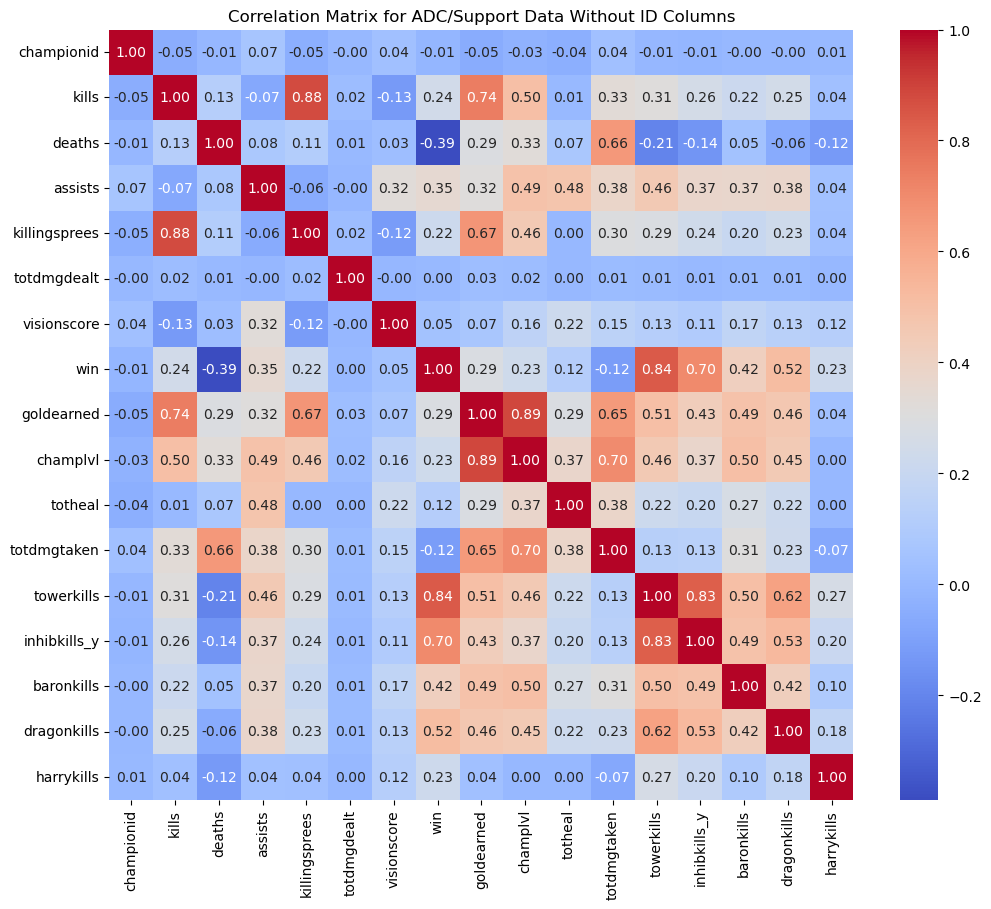

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop ID-related columns before selecting numeric columns
id_columns = ['id', 'matchid', 'player', 'teamid']  # Add any other ID-related columns here
dataset_filtered = dataset.drop(columns=id_columns, errors='ignore')  # Drop ID-related columns if they exist

# Select only numeric columns from the filtered dataset
adc_support_numeric = dataset_filtered.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix_adc_support = adc_support_numeric.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(
    correlation_matrix_adc_support,  # Provide the correlation matrix
    annot=True,                      # Annotate the heatmap with correlation values
    cmap="coolwarm",                 # Set the color map to "coolwarm"
    fmt=".2f"                        # Format correlation values to 2 decimal places
)
plt.title("Correlation Matrix for ADC/Support Data Without ID Columns")  # Add a title
plt.savefig("Support_correlation.png")
plt.show()  # Display the heatmap


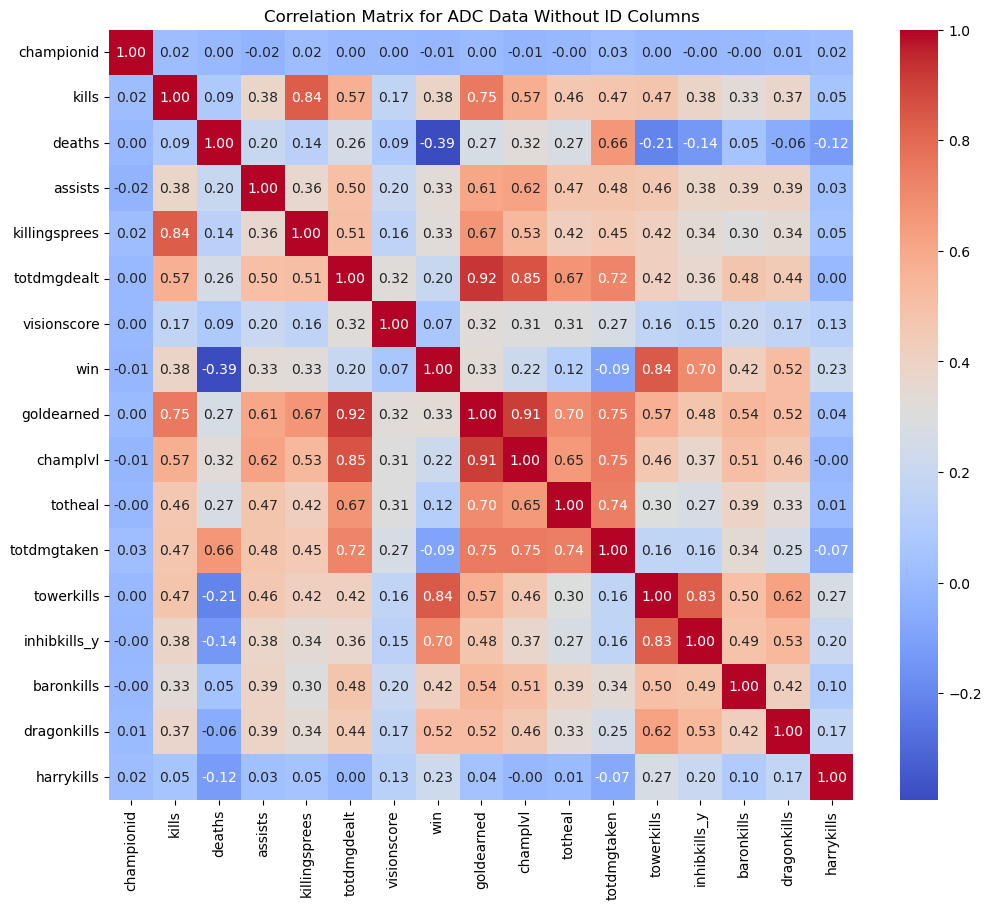

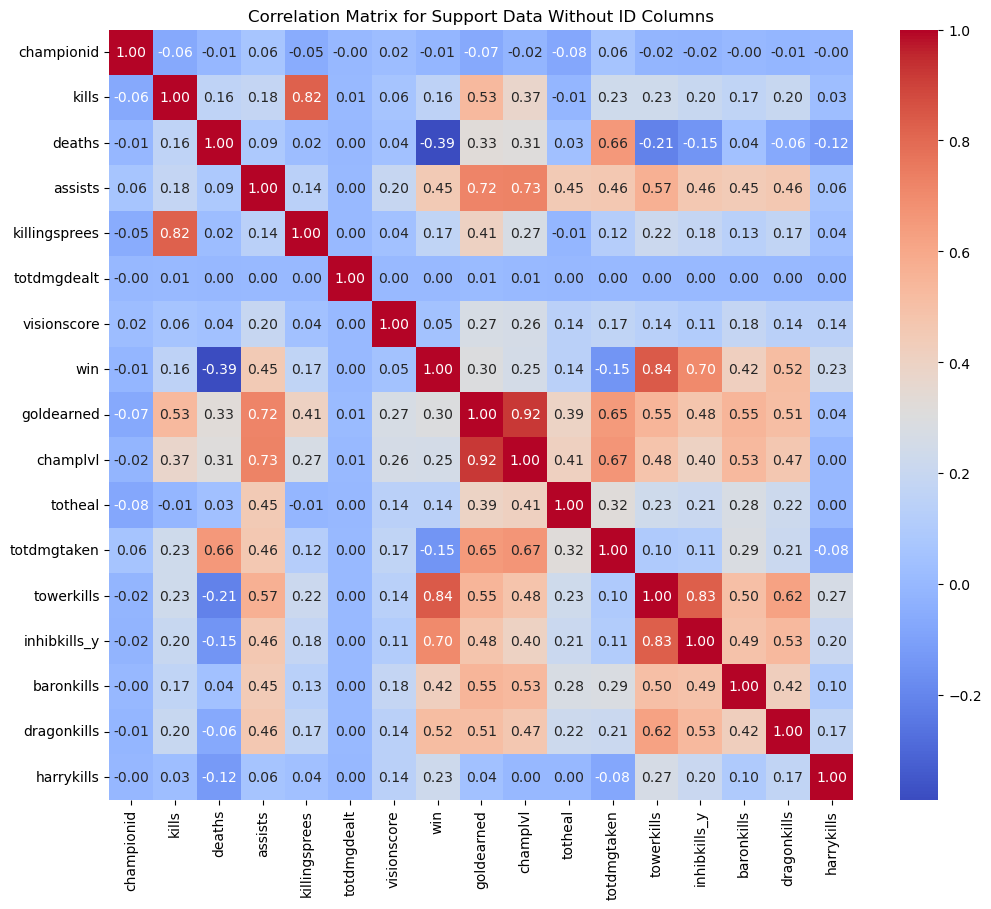

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns related to IDs to drop
id_columns = ['id', 'matchid', 'teamid', 'player']  # Add any additional ID-related columns here

# Filter data for ADC and Support roles
adc_data = dataset[dataset['position'] == 'ADC']
support_data = dataset[dataset['position'] == 'SUPP']

# Drop ID-related columns from ADC and Support data
adc_data_filtered = adc_data.drop(columns=id_columns, errors='ignore')
support_data_filtered = support_data.drop(columns=id_columns, errors='ignore')

# Select only numeric columns for each role
adc_numeric = adc_data_filtered.select_dtypes(include=['float64', 'int64'])
support_numeric = support_data_filtered.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrices
adc_correlation_matrix = adc_numeric.corr()
support_correlation_matrix = support_numeric.corr()

# Visualize the ADC correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    adc_correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f"
)
plt.title("Correlation Matrix for ADC Data Without ID Columns")
plt.savefig("ADC_correlation.png")
plt.show()

# Visualize the Support correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    support_correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f"
)
plt.title("Correlation Matrix for Support Data Without ID Columns")

plt.show()


In [19]:
dataset.to_csv('dataset.csv', index = False)